<a href="https://colab.research.google.com/github/RohanDubeySF/Training/blob/master/Feature%20Engineering/Handling-Missing-values/Missing1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Random Sample Imputation**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/refs/heads/master/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data=data.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked'])

In [ ]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data['Age'].isnull().sum()

177

In [ ]:
data["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
data.Age.sample(5)

,Age
185,NaN
340,2.0
685,25.0
742,21.0
807,18.0


In [ ]:
sap=data['Age'].dropna().sample(data["Age"].isnull().sum(),random_state=69)
sap

,Age
530,2.0
754,48.0
336,29.0
187,45.0
390,36.0
...,...
858,24.0
426,28.0
0,22.0
796,49.0


In [ ]:
sap.index=data[data['Age'].isnull()].index

In [ ]:
sap


,Age
5,2.0
17,48.0
19,29.0
26,45.0
28,36.0
...,...
859,24.0
863,28.0
868,22.0
878,49.0


In [ ]:
data["Age"]=data["Age"].fillna(sap)

In [ ]:
data['Age'].isnull().sum()

0

#**End Of Distribution Imputation**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/refs/heads/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


calculating the value outside the 3rd standard deviation


In [ ]:
extreme=df.Age.mean()+ 3*df.Age.std()
extreme

73.27860964406095

In [ ]:
df['Age_EoD']=df['Age'].fillna(extreme)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_EoD
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,73.27861
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.00000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.00000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.00000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.00000


In [ ]:
df=df.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked'])

In [ ]:
df['Age_median']=df['Age'].fillna(df.Age.median())

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_EoD,Age_median
0,0,22.0,7.2500,22.00000,22.0
1,1,38.0,71.2833,38.00000,38.0
2,1,26.0,7.9250,26.00000,26.0
3,1,35.0,53.1000,35.00000,35.0
4,0,35.0,8.0500,35.00000,35.0
5,0,NaN,8.4583,73.27861,28.0
6,0,54.0,51.8625,54.00000,54.0
7,0,2.0,21.0750,2.00000,2.0
8,1,27.0,11.1333,27.00000,27.0
9,1,14.0,30.0708,14.00000,14.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age_EoD', ylabel='Count'>

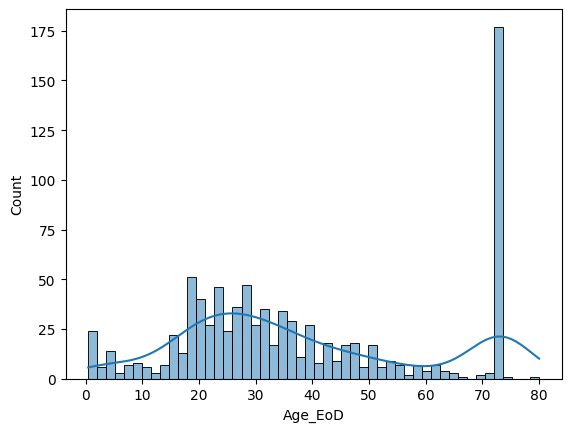

In [ ]:
sns.histplot(df.Age_EoD,kde=True,bins=50)

<Axes: xlabel='Age_median', ylabel='Count'>

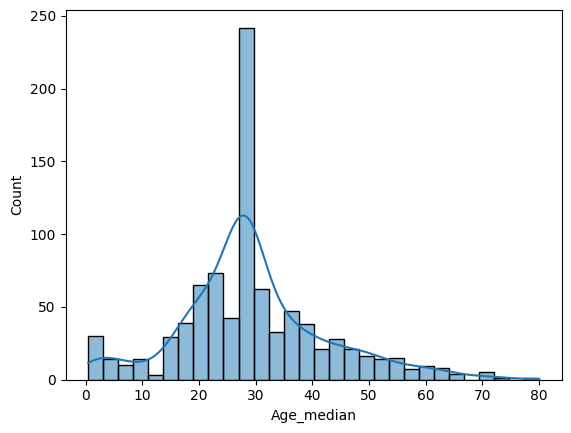

In [ ]:
sns.histplot(df.Age_median,kde=True)